With the comparison and ranking example that we discussed in the previous chapter to display the top 12 countries in Africa by GDP using the squarify algorithm (with matplotlib), you can obtain a plot that looks similar to a tree map, as shown in the following code

In [1]:
# Squarified Treemap Layout : source file (squarify.py)
# Implements algorithm from Bruls, Huizing, van Wijk, "Squarified
#Treemaps"
# squarify was created by Uri Laserson
# primarily intended to support d3.js

In [4]:
def normalize_sizes(sizes, dx, dy):
    total_size = sum(sizes)
    total_area = dx * dy
    sizes = map(float, sizes)
    sizes = map(lambda size: size * total_area / total_size, sizes)
    return sizes

def pad_rectangle(rect):
    if rect['dx'] > 2:
        rect['x'] +=1
        rect['dx'] -= 2
    if rect['dy'] > 2:
        rect['y'] += 1
        rect['dy'] -= 2
def layoutrow(sizes, x, y, dx, dy):
    covered_area = sum(sizes)
    width = covered_area / dy
    rects = []
    for size in sizes:
        rects.append({'x': x, 'y': y, 'dx': width, 'dy': size / width})
        y += size / width
    return rects
def layoutcol(sizes, x, y, dx, dy):
    covered_area = sum(sizes)
    height = covered_area / dx
    rects = []
    for size in sizes:
        rects.append({'x':x, 'y':y, 'dx':size/height,'dy':height})
        x += size / height
    return rects

def layout(sizes, x, y, dx, dy):
    return layoutrow(sizes, x, y, dx, dy) if dx >= dy else layoutcol(sizes, x, y, dx, dy)

def leftoverrow(sizes, x, y, dx, dy):
    covered_area = sum(sizes)
    width = covered_area / dy
    leftover_x = x + width
    leftover_y = y
    leftover_dx = dx - width
    leftover_dy = dy
    return (leftover_x, leftover_y, leftover_dx, leftover_dy)

def worst_ratio(sizes, x, y, dx, dy):
    return max([max(rect['dx'] / rect['dy'], rect['dy'] / rect['dx']) for rect in layout(sizes, x, y, dx, dy)])

def squarify(sizes, x, y, dx, dy):
    sizes = map(float, sizes)
    if len(sizes) == 0:
        return []
    if len(sizes) == 1:
        return layout(sizes, x, y, dx, dy)
    #figure out where 'split' should be
    i = 1
    while i < len(sizes) and worst_ratio(sizes[:i], x, y, dx, dy) >= worst_ratio(sizes[:(i+1)], x, y, dx, dy):
        i += 1
    current = sizes[:i]
    remaining = sizes[i:]
    (leftover_x, leftover_y, leftover_dx, leftpver_dy) = leftover(current, x, y, dx, dy)
    return layout(current, x, y, dx, dy) +  squarify(reamaining, leftover_x, leftover_y, leftover_dx, leftover_dy)
    
def padded_squarift(sizes, x, y, dx, dy):
    rects = squarify(sizes, x, y, dx, dy)
    for rect in rects:
        pad_rectangle(rect)
    return rects



    
                  

        

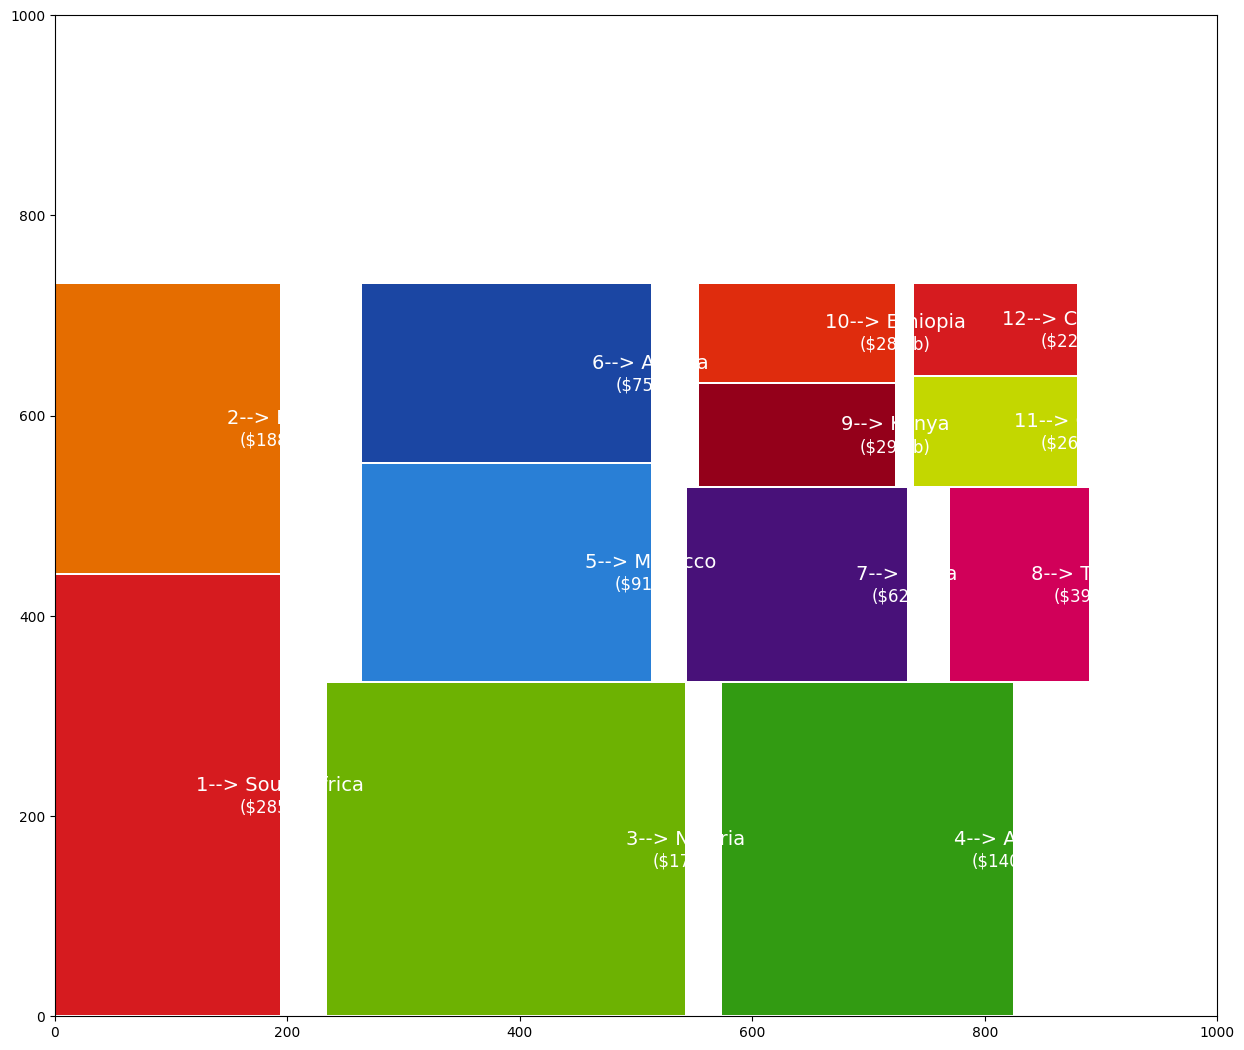

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm
import random
import squarify
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
x = 0.
y = 0.
width = 950.
height = 733.
norm_x = 1000
norm_y = 1000
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)

initvalues = [285.4, 188.4, 173, 140.6, 91.4, 75.5, 62.3, 39.6, 29.4, 28.5, 26.2, 22.2]
values = initvalues
labels = ["South Africa", "Egypt", "Nigeria", "Algeria", "Morocco",
"Angola", "Libya", "Tunisia", "Kenya", "Ethiopia", "Ghana", "Cameron"]
colors = [(214,27,31),(229,109,0),(109,178,2),(50,155,18),
(41,127,214),(27,70,163),(72,17,121),(209,0,89),
(148,0,26),(223,44,13), (195,215,0)]
# Scale the RGB values to the [0, 1] range, which is the format
#matplotlib accepts.
for i in range(len(colors)):
    r, g, b = colors[i]
    colors[i] = (r/255., g/255., b/255.)

# values must be sorted descending (and positive, obviously)
values.sort(reverse=True)
# the sum of the values must equal the total area to be laid out
# i.e., sum(values) == width * height
values = squarify.normalize_sizes(values, width, height)

# padded rectangles will probably visualize better for certain cases
rects = squarify.padded_squarify(values, x, y, width, height)

cmap = matplotlib.cm.get_cmap()

color = [cmap(random.random()) for i in range(len(values))]
x = [rect['x'] for rect in rects]
y = [rect['y'] for rect in rects]
dx = [rect['dx'] for rect in rects]
dy = [rect['dy'] for rect in rects]

ax.bar(x, dy, width=dx, bottom=y, color=colors, label=labels)
va = 'center'
idx = 1

for l, r, v in zip(labels, rects, initvalues):
    x, y, dx, dy = r['x'], r['y'], r['dx'], r['dy']
    ax.text(x + dx / 2, y + dy / 2+10, str(idx)+"--> "+l, va=va,ha='center', color='white', fontsize=14)
    ax.text(x + dx / 2, y + dy / 2-12, "($"+str(v)+"b)", va=va,ha='center', color='white', fontsize=12)
    idx = idx+1
ax.set_xlim(0, norm_x)
ax.set_ylim(0, norm_y)
plt.show()
    
    